In [28]:
import os
import os.path
import pandas as pd
import pickle
from PIL import Image, ImageDraw
import re
import math
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def readPickle(filename):

    # reload a file to a variable
    with open(filename, 'rb') as file:
        a_dict1 =pickle.load(file)
        
    return a_dict1

In [30]:
def get2Distance(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

def get3Distance(x1, y1, z1, x2, y2, z2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    return distance

C:\Users\Haruna\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


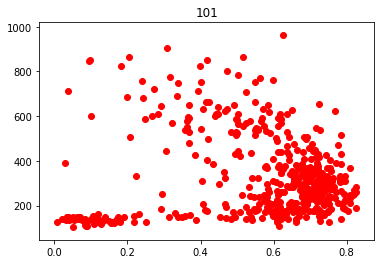

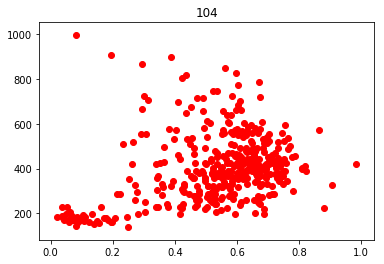

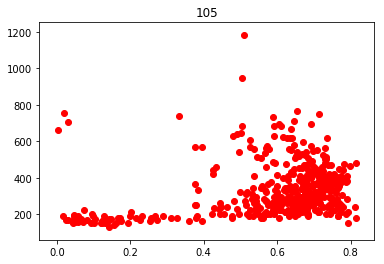

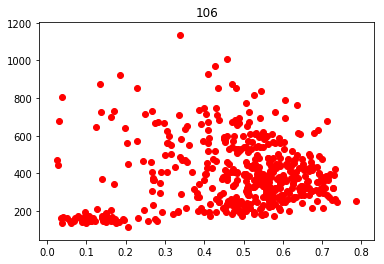

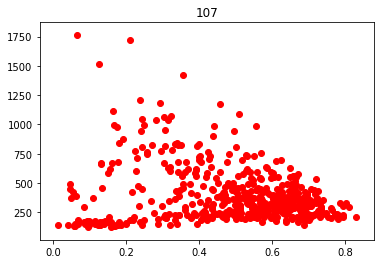

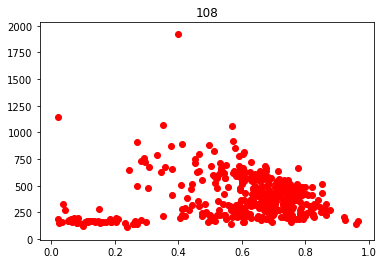

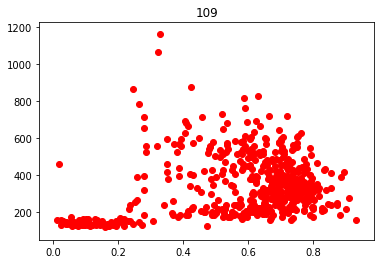

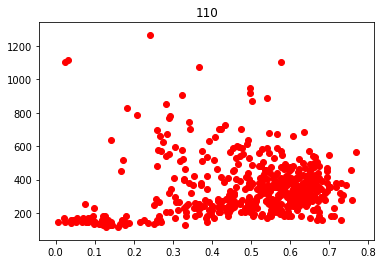

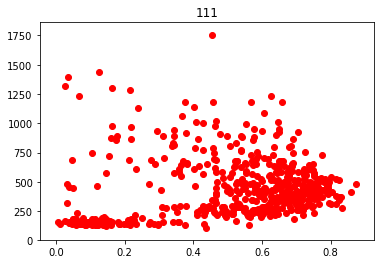

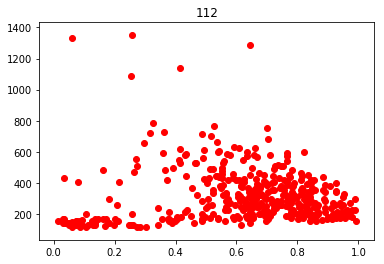

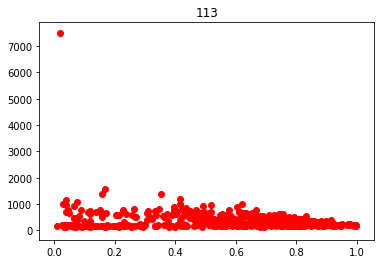

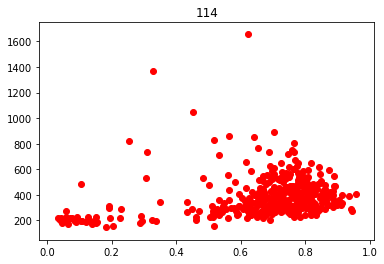

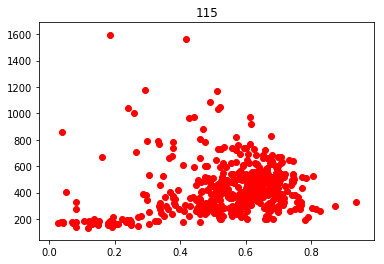

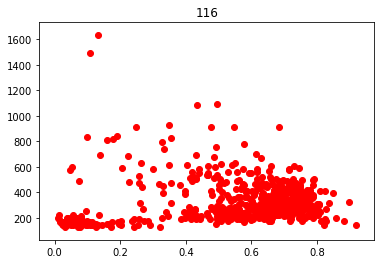

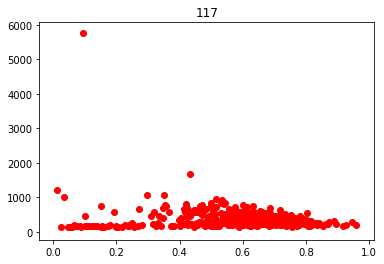

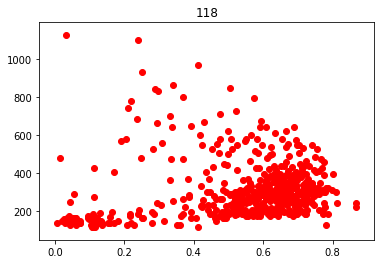

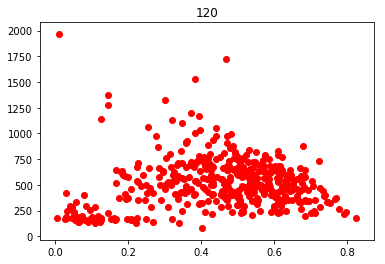

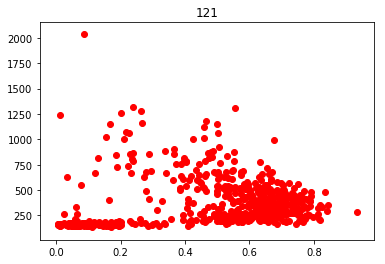

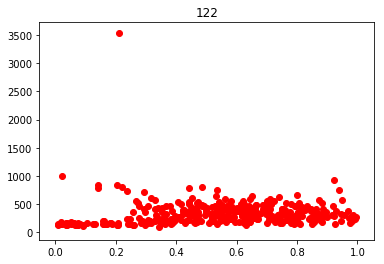

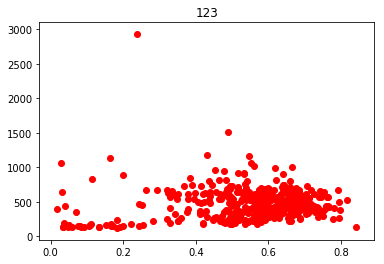

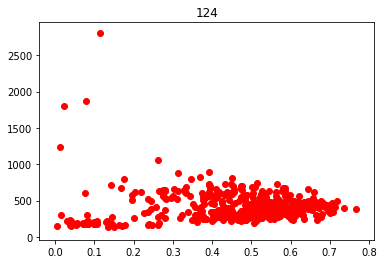

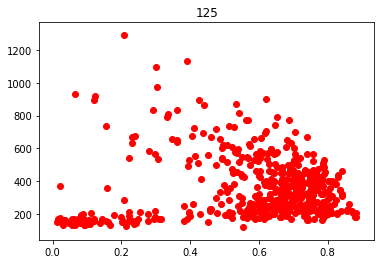

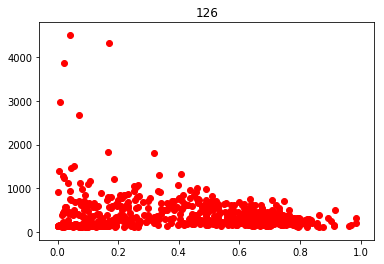

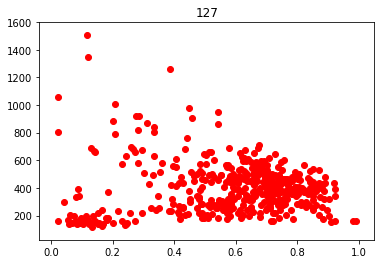

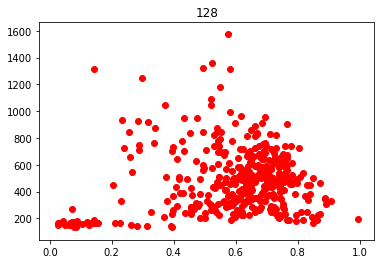

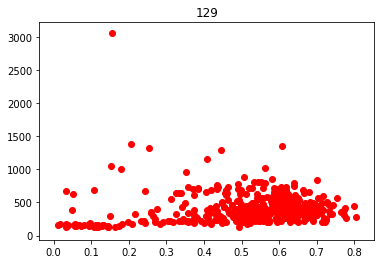

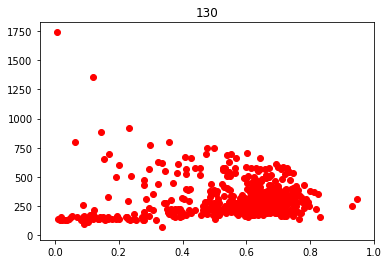

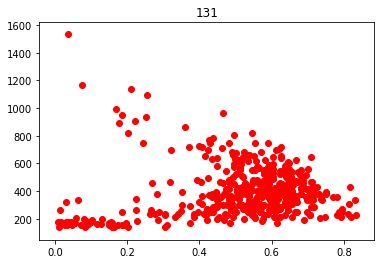

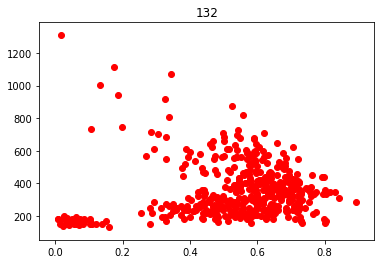

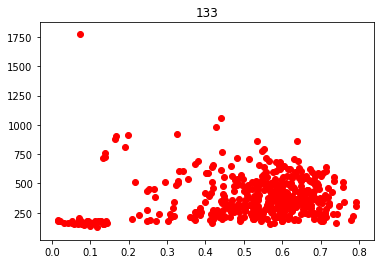

In [31]:
dictFix = readPickle('eyeMovementData.pkl')
dictFin = readPickle('fingerMovementData.pkl')

count = 1
for person in dictFin.keys():
    plt.figure(count)
    plt.title(person)
    for sentence in dictFin[person]['2'].keys():
        iki = dictFin[person]['2'][sentence]['IKI']
        touchx = dictFin[person]['2'][sentence]['touchx']
        touchy = dictFin[person]['2'][sentence]['touchy']
        x = dictFin[person]['2'][sentence]['x1']
        y = dictFin[person]['2'][sentence]['y1']
        z = dictFin[person]['2'][sentence]['z1']
        
        for t in range(1, len(iki)):
            key_distance = get2Distance(touchx[t-1], touchy[t-1], touchx[t], touchy[t])
            px = x[t]
            py = y[t]
            pz = z[t]
            
            finger_path = 0
            for p in range(1, len(px)):
                finger_path = finger_path + get3Distance(px[p-1], py[p-1], pz[p-1], px[p], py[p], pz[p])
            
            try:
                efficiency = key_distance / finger_path
                if efficiency<=1:
                    plt.scatter(efficiency, iki[t], c = "red")
            except ZeroDivisionError: None
                
    plt.savefig(person + ".png")
    count = count + 1